In [114]:
import numpy as np   #importing numpy
import pandas as pd  #importing pandas
import warnings    #importing warnings
warnings.filterwarnings("ignore")     #ignoring warnings

from sklearn.metrics import confusion_matrix   #importing confusion matrix
from sklearn.metrics import classification_report #importing classification report
from sklearn.model_selection import train_test_split  #importing train_test_split
from sklearn.naive_bayes import GaussianNB    #importing Naive Bayes

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt

In [139]:
#Question1
#1.1
train = pd.read_csv('train.csv') #reading train dataset with pandas and saving as train
test = pd.read_csv('test.csv')   #reading test dataset with pandas and saving as train

In [140]:
train['Sex'] = train['Sex'].replace(["female", "male"], [1, 0])    #Converting Female & Male in Sex from string to 1 & 0
train['Embarked'] = train['Embarked'].replace(['S','C','Q'],[0,1,2]) #Converting S,C,Q in Embarked from string to 0,1,2

In [141]:
train.fillna(train.mean(),axis=0,inplace=True) #replacing nulls with mean value in train dataset

In [142]:
train['Survived'].corr(train['Sex']) #Calculating Correlation between Survived & Sex

0.5433513806577552

In [119]:
#1.1 (a)
#Do you think we should keep this feature?

#Answer in word doc.

In [143]:
#1.2
train.corr().style.background_gradient(cmap="GnBu")     #showing correlation

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030479
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.108472
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.043714
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.118347
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.009464
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.060591
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.079300
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.063396
Embarked,-0.030479,0.108472,0.043714,0.118347,0.009464,-0.060591,-0.079300,0.063396,1.000000


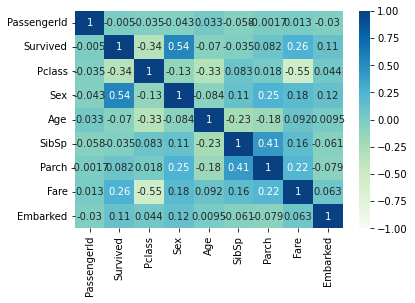

In [144]:
sns.heatmap(train.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='GnBu')   #visualization of above correlation 
plt.show()

In [145]:
#1.3
X = train.drop(columns = ['Name','Survived','Ticket','Cabin'])    #Considering independent variables as X
Y = train[['Survived']]   #Considering dependent variable as Y

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#splitting the dataset into testing & training sets

In [147]:
# Gaussian Naive Bayes   
classifier = GaussianNB()    #doing Naive-Bayes classification
classifier.fit(X_train, Y_train)   #sending X & Y training datasets to the classifier

Y_pred = classifier.predict(X_test)   #predicting values

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))   #creating classification report for Y test & pred
print(confusion_matrix(Y_test, Y_pred))    #creating confusion matrix for Y test & pred
# Accuracy score
from sklearn.metrics import accuracy_score    #importing accuracyscore
print('accuracy is',accuracy_score(Y_pred,Y_test))    #calculating accuracy

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179

[[90 20]
 [17 52]]
accuracy is 0.7932960893854749


In [148]:
#Question 2
df = pd.read_csv('glass.csv')    #reading csv file using pandas
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [149]:
# 2.1 Train and test dataset

X = df.drop(columns=['Type'])     #Considering independent variables as X
Y = df['Type']     #Considering dependent variable as Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)   
#splitting the dataset into testing & training sets



In [150]:
# 2.2 Gaussian Naive Bayes

classifier = GaussianNB()      #doing Naive-Bayes classification
classifier.fit(X_train, Y_train)     #sending X & Y training datasets to the classifier

Y_pred = classifier.predict(X_test)     #predicting values

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))     #creating classification report for Y test & pred
print(confusion_matrix(Y_test, Y_pred))     #creating confusion matrix for Y test & pred
# Accuracy score
from sklearn.metrics import accuracy_score      #importing accuracyscore
print('accuracy is',accuracy_score(Y_pred,Y_test))    #calculating accuracy

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [151]:
# 2.3 Support Vector Machine's 
from sklearn.svm import SVC    #importing SVC
classifier = SVC()    #setting classifier for SVC
classifier.fit(X_train, Y_train)     #sending X & Y training datasets to the classifier

Y_pred = classifier.predict(X_test)   #predicting values

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))    #creating classification report for Y test & pred
print(confusion_matrix(Y_test, Y_pred))    #creating confusion matrix for Y test & pred
# Accuracy score
from sklearn.metrics import accuracy_score    #importing accuracyscore
print('accuracy is',accuracy_score(Y_pred,Y_test))     #calculating accuracy

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


In [152]:
#2.4
df.corr().style.background_gradient(cmap="GnBu")    #showing total correlation

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


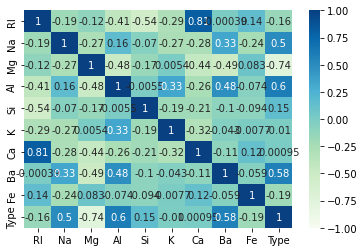

In [153]:
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='GnBu')    #visualization of above correlation 
plt.show()

In [ ]:
#2.5
#Which algorithm you got better accuracy? Can you justify why?

#Answer in word doc.
